In [1]:
%matplotlib inline
import matplotlib as plt
plt.style.use('ggplot')
import pandas as pd
from datetime import datetime

In [2]:
from IPython.core.display import HTML
css = open("styles/style-table.css").read() + open('styles/style-notebook.css').read() + open("styles/test.css").read()
HTML('<style>{}</style>'.format(css))

In [4]:
dtypes=[str,datetime.date,int,int,int,int]
threemonth_metrics = pd.read_csv("raw_data/three-month-export_2016-04-04.csv",parse_dates=[1])
threemonth_metrics.head()

,item_title,release_date,downloads__april,downloads__march,downloads__february,downloads__total
0,TBP50 - Not Giving a Good Got Damn,2016-04-04 10:24:41,114,0,0,114
1,TBP49 - Welterweight Gold,2016-03-31 10:47:53,330,253,0,583
2,"TBP48 - Inertia, My Friend!",2016-03-27 18:30:33,27,460,0,487
3,TBP47 - Bottoms Up 4,2016-03-20 05:09:56,13,399,0,412
4,TBP46 - The Fundamental Conflict,2016-03-13 19:10:34,10,637,0,647


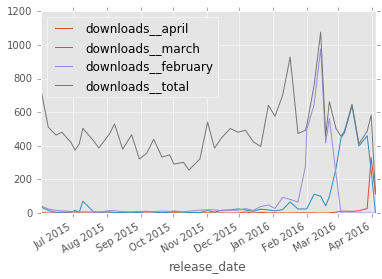

In [5]:
threemonth_metrics.plot(x='release_date')

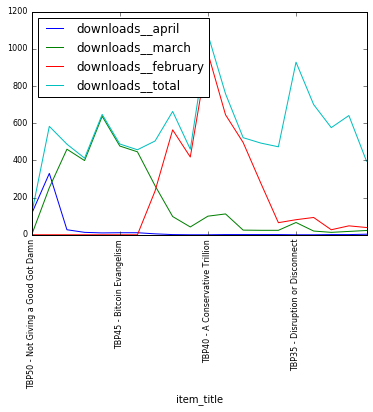

In [51]:
threemonth_metrics[0:20].plot(rot=90, fontsize=8)

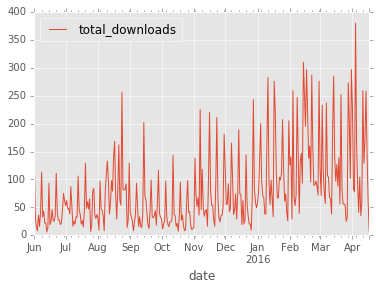

In [3]:
daily_metrics_Apr17 = pd.DataFrame.from_csv("raw_data/daily-totals_2016-04-17.csv", index_col=None, parse_dates=[0])
daily_metrics_Apr12 = pd.DataFrame.from_csv("raw_data/daily-totals_2016-04-12.csv", index_col=None, parse_dates=[0])
daily_metrics_Apr04 = pd.DataFrame.from_csv("raw_data/daily-totals_2016-04-04.csv", index_col=None, parse_dates=[0])
daily_metrics_Apr17.plot(x='date',y='total_downloads')

In [4]:
daily_Apr17 = daily_metrics_Apr17.set_index('date')
monthly_Apr17 = daily_Apr17.resample('M').sum()
daily_Apr12 = daily_metrics_Apr12.set_index('date')
monthly_Apr12 = daily_Apr12.resample('M').sum()
daily_Apr04 = daily_metrics_Apr04.set_index('date')
monthly_Apr04 = daily_Apr04.resample('M').sum()

In [18]:
monthly_Apr17.describe()

,total_downloads
count,11.000000
mean,2359.272727
std,1095.928017
min,1090.000000
25%,1414.000000
50%,2240.000000
75%,2928.000000
max,4373.000000


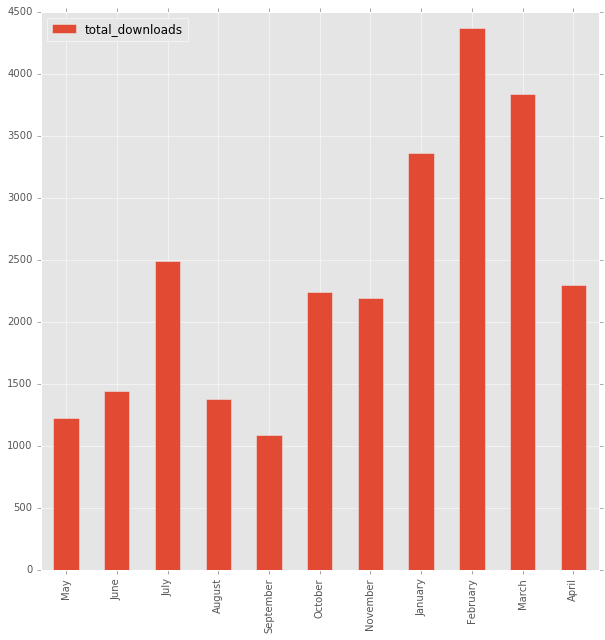

In [9]:
#  Sort and plot by month
months={0:"January", 1:"February", 2:"March", 3:"April", 4:"May", 5:"June", 6:"July", 7:"August", 8:"September", 9:"October", 10:"November", 11:"December"}
#  Relabel to month name
ts = pd.DataFrame(monthly_Apr17).set_index(pd.Series([4,5,6,7,8,9,10,0,1,2,3]).apply(lambda x: months[x]))
#  Plot
ts.plot(kind='bar', figsize=(10,10))

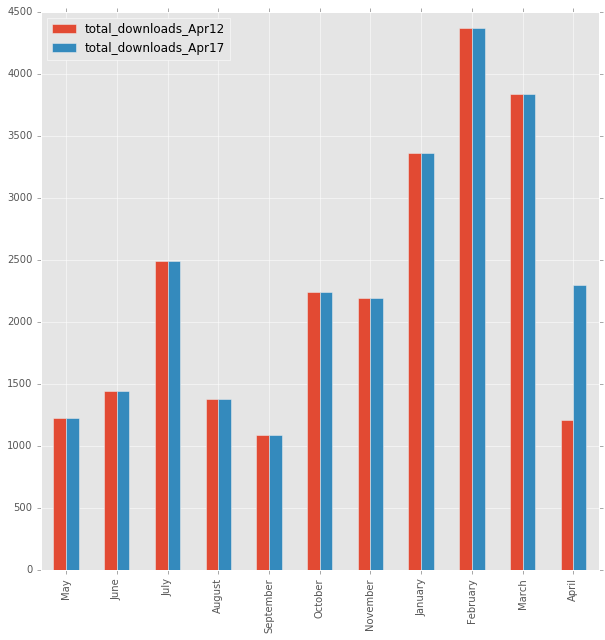

In [5]:
#  Sort and plot by month
months={0:"January", 1:"February", 2:"March", 3:"April", 4:"May", 5:"June", 6:"July", 7:"August", 8:"September", 9:"October", 10:"November", 11:"December"}
daily_Apr17 = daily_metrics_Apr17.set_index('date')
daily_Apr12 = daily_metrics_Apr12.set_index('date')
daily_Apr04 = daily_metrics_Apr04.set_index('date')
ts = daily_Apr17.total_downloads.resample('M').sum()
ts_old = daily_Apr12.total_downloads.resample('M').sum()
#  Relabel to month name
ts = pd.DataFrame(ts).set_index(pd.Series([4,5,6,7,8,9,10,0,1,2,3]).apply(lambda x: months[x]))
ts.columns = ['total_downloads_Apr17']
ts_old = pd.DataFrame(ts_old).set_index(pd.Series([4,5,6,7,8,9,10,0,1,2,3]).apply(lambda x: months[x]))
ts_old.columns = ['total_downloads_Apr12']
#  Merge
compared = pd.merge(ts_old, ts, left_index=True, right_index=True)
#  Plot
compared.plot(kind='bar', figsize=(10,10))

In [16]:
# Get Dataframe of release dates
episodes = pd.DataFrame.from_csv('/Users/coreypetty/PycharmProjects/TBP_metrics/raw_data/three-month-export_2016-04-17.csv', 
                                            index_col=None, parse_dates=['release_date'])
# episodes = episodes.set_index('release_date')
episodes = episodes[['release_date','item_title','downloads__total']]
episodes.columns = ['release_date','title', 'downloads']
release_dates = list(episodes.release_date)

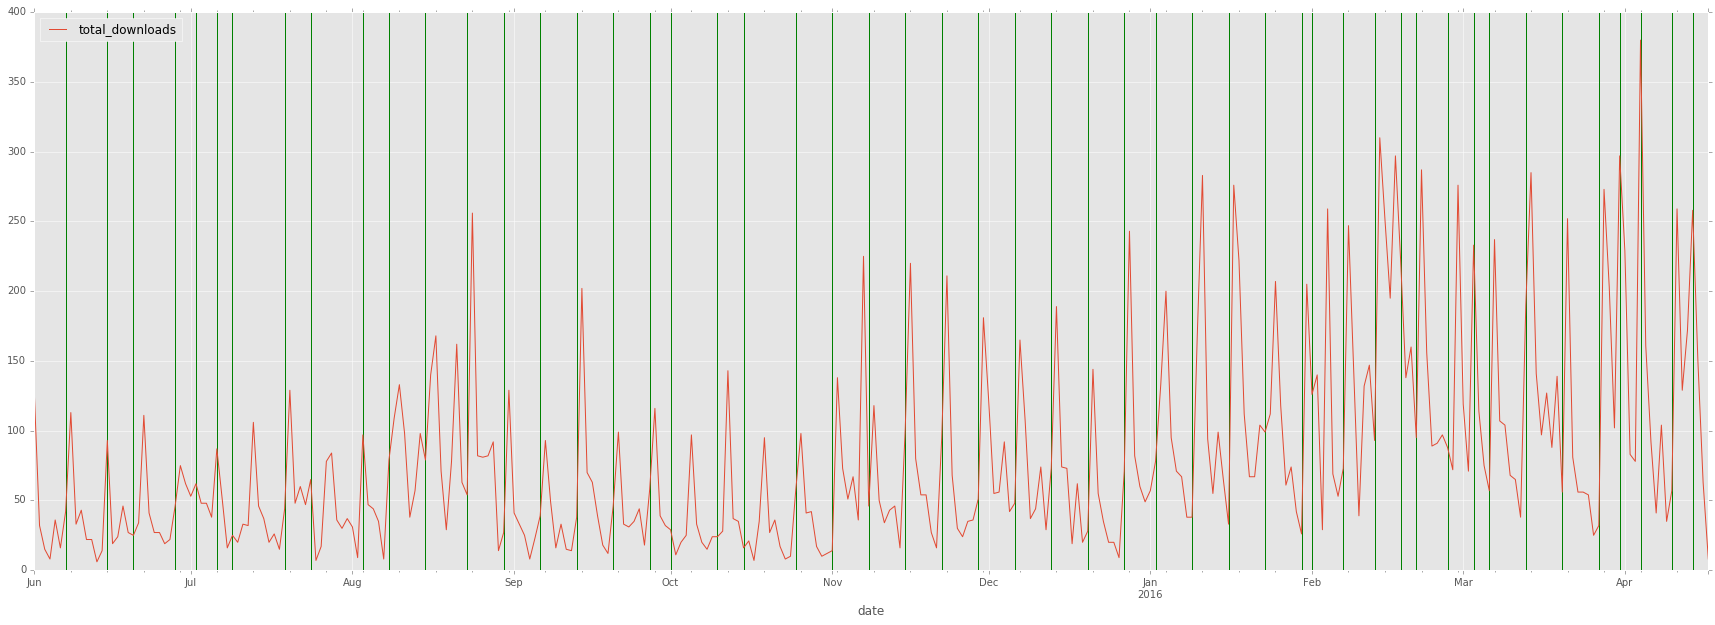

In [17]:
ax = daily_metrics_Apr17.plot(x='date',y='total_downloads', figsize=(30,10))
ymin, ymax = ax.get_ylim()
ax.vlines(x=release_dates, ymin=ymin, ymax=ymax, color='g')